# 加载所需的mask #

C:\Users\32557\AppData\Local\Temp\ipykernel_3000\3393928185.py:15: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  scatter_mask = np.loadtxt(os.path.join(path,'scatter_mask.txt'),delimiter=',',dtype='int')
C:\Users\32557\AppData\Local\Temp\ipykernel_3000\3393928185.py:16: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(

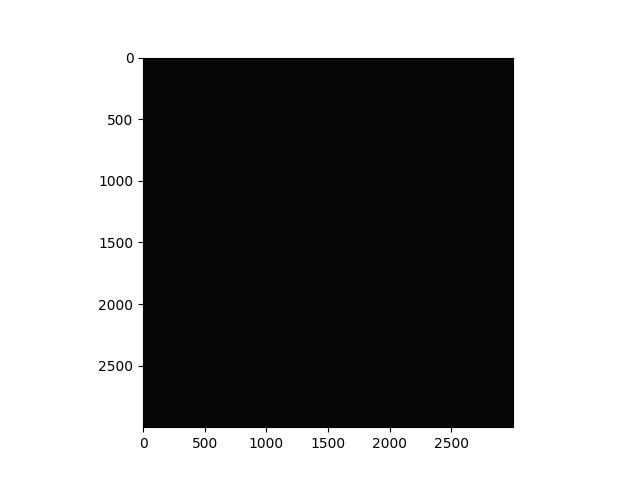

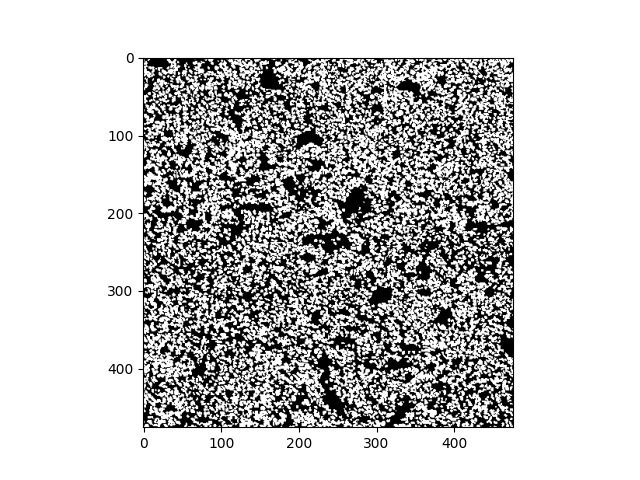

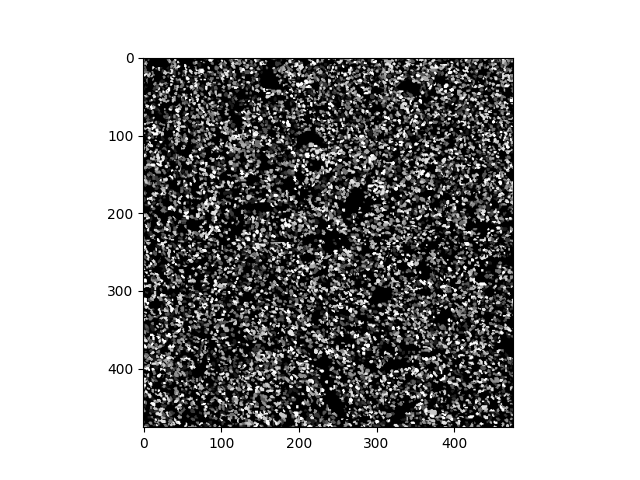

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib widget
%matplotlib notebook

#加载mask 数据， mask 数据与gene_mapping 同大小（5000*500）
#incell_mask:  range {0,1}   0 无细胞  1 有细胞
#ingroup_mask  range [1-N]   N denoted 细胞总数； 数字代表被 mask 为同一个细胞的组


path = r"C:\Users\32557\PycharmProjects\pythonProject1\pythonProject\data"

scatter_mask = np.loadtxt(os.path.join(path,'scatter_mask.txt'),delimiter=',',dtype='int')
incell_mask  = np.loadtxt(os.path.join(path,'incell_mask.txt'),delimiter=',',dtype='int')
ingroup_mask = np.loadtxt(os.path.join(path,'ingroup_mask.txt'),delimiter=',',dtype='int')

plt.figure()
plt.imshow(scatter_mask,cmap='gray')

plt.figure()
plt.imshow(incell_mask,cmap='gray')

plt.figure()
plt.imshow(ingroup_mask%10,cmap='gray')

# 截取基因数据 #

In [8]:
import anndata as ad

fname = r"C:\Users\32557\Desktop\data\images from Dr.zhang zhiming_CXX\image\real4_8119_eGFP_mRNA_cDNA_matrix.h5ad"
adata = ad.read_h5ad(fname)
count_matrix = adata.X

In [23]:
print(count_matrix.shape,type(count_matrix))
# csr 的稀疏矩阵中， 被压缩的是基因表达，不影响 spot\pixel 的选取
incell_mask = incell_mask.astype('bool').reshape(-1)
incell_count_matrix = count_matrix[incell_mask]
print(incell_count_matrix.shape,type(incell_count_matrix))
print("there are %d spots in cells, and others are not in cell"%(incell_count_matrix.shape[0]))

(25000000, 28367) <class 'scipy.sparse._csr.csr_matrix'>
(113465, 28367) <class 'scipy.sparse._csr.csr_matrix'>
there are 113465 spots in cells, and others are not in cell


In [22]:
cell_list = []
for i in range(np.max(ingroup_mask)):
    ingroup_mask_cell = (ingroup_mask==i).astype('bool').reshape(-1)
    cell_list.append(count_matrix[ingroup_mask_cell])
print("there are %d cells, and their count_matrix squeue in list"%(len(cell_list)))

there are 19812 cells, and their count_matrix squeue in list
